**Práctica 2:**
Run descriptive statistics to data, identify the entities and relations and draw its diagram. Also group data by entities and obtain statistics from grouped data.

**Cargar datos y vista rápida**

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Image

# Cargar el dataset limpio de la práctica 1
df = pd.read_csv("Crimenes_Chicago_Limpio_7000.csv")

# Vista rápida
print("Shape:", df.shape)
df.head()



Shape: (7000, 19)


,ID,Número de Caso,Fecha,Tipo Principal,Descripción,Ubicación,¿Hubo Arresto?,Violencia Doméstica,Distrito,Barrio,Área Comunitaria,Latitud,Longitud,Año,Mes,Día,Hora,Día de la Semana,¿Es Fin de Semana?
0,9164758,HW309882,2013-06-08 12:45:00,NARCOTICS,MANU/DELIVER: HEROIN (WHITE),PARK PROPERTY,Sí,No,10.0,24.0,29.0,41.865297,-87.695870,2013,6,8,12,Sábado,Sí
1,10660660,HZ411015,2016-08-28 17:00:00,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,No,No,8.0,13.0,65.0,41.763451,-87.719924,2016,8,28,17,Domingo,Sí
2,9616864,HX266874,2014-05-18 18:30:00,BATTERY,SIMPLE,PARK PROPERTY,Sí,No,10.0,12.0,29.0,41.858619,-87.695672,2014,5,18,18,Domingo,Sí
3,8988586,HW136000,2013-01-29 11:30:00,PROSTITUTION,SOLICIT ON PUBLIC WAY,SIDEWALK,Sí,No,25.0,37.0,25.0,41.905386,-87.746030,2013,1,29,11,Martes,No
4,9118533,HW263706,2013-05-05 02:00:00,THEFT,FROM BUILDING,BAR OR TAVERN,No,No,18.0,43.0,7.0,41.918817,-87.648534,2013,5,5,2,Domingo,Sí


**Estadísticas descriptivas (categorías y conteos)**

In [117]:
# --- Resumen de estadísticas descriptivas ---
categorical_cols = df.select_dtypes(include=["object"]).columns
# Resumen categóricas
desc_categoricas = df[categorical_cols].describe().transpose()

# Limpiar redundancias: eliminar top/freq si unique == count
for col in desc_categoricas.index:
    if desc_categoricas.loc[col, "unique"] == desc_categoricas.loc[col, "count"]:
        desc_categoricas.loc[col, "top"] = "-"
        desc_categoricas.loc[col, "freq"] = "-"

# Cambiar nombres de columnas a español
desc_categoricas = desc_categoricas.rename(
    columns={
        "unique": "Únicos",
        "top": "Más frecuente",
        "freq": "Frecuencia"
    }
)

# Quitar la columna 'count' (esto porque en todas las filas el valor era de 7000, mejor lo puse arriba con un print)
desc_categoricas = desc_categoricas.drop(columns=["count"])

# Mostrar resumen
print(f"Hay {len(df)} crímenes registrados en total.\nResumen del data set:")
display(desc_categoricas)



Hay 7000 crímenes registrados en total.
Resumen del data set:


,Únicos,Más frecuente,Frecuencia
Número de Caso,7000,-,-
Fecha,6901,2013-05-03 17:00:00,2
Tipo Principal,27,THEFT,1548
Descripción,195,SIMPLE,747
Ubicación,91,STREET,1594
¿Hubo Arresto?,2,No,5183
Violencia Doméstica,2,No,5895
Día de la Semana,7,Viernes,1043
¿Es Fin de Semana?,2,No,4978


**Visualizaciones descriptivas**


--- Top 10 Tipos de Crímenes ---
Tipo Principal
THEFT                  1548
BATTERY                1282
CRIMINAL DAMAGE         749
NARCOTICS               651
OTHER OFFENSE           455
ASSAULT                 427
BURGLARY                411
DECEPTIVE PRACTICE      316
MOTOR VEHICLE THEFT     294
ROBBERY                 287
Name: count, dtype: int64


C:\Users\idali\AppData\Local\Temp\ipykernel_26420\2419839964.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipos_crimen.values, y=tipos_crimen.index, palette="viridis")


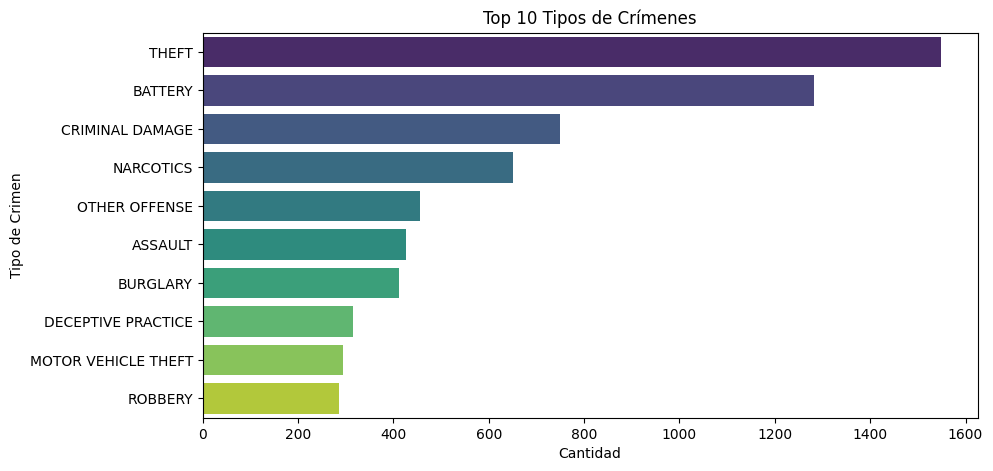

In [118]:
# Conteo de los crímenes más comunes
tipos_crimen = df["Tipo Principal"].value_counts().head(10)

print("\n--- Top 10 Tipos de Crímenes ---")
print(tipos_crimen)

# Visualización
plt.figure(figsize=(10,5))
sns.barplot(x=tipos_crimen.values, y=tipos_crimen.index, palette="viridis")
plt.title("Top 10 Tipos de Crímenes")
plt.xlabel("Cantidad")
plt.ylabel("Tipo de Crimen")
plt.show()


C:\Users\idali\AppData\Local\Temp\ipykernel_26420\3360476556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="¿Hubo Arresto?", data=df, palette="Set2")


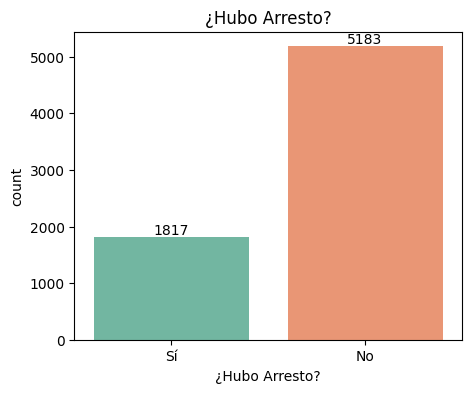

C:\Users\idali\AppData\Local\Temp\ipykernel_26420\3360476556.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Violencia Doméstica", data=df, palette="Set1")


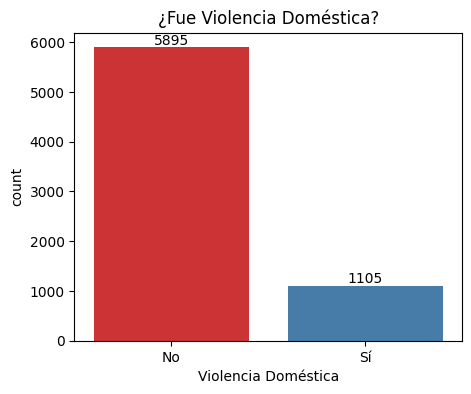

In [119]:


# --- Gráfica: ¿Hubo Arresto? ---
plt.figure(figsize=(5,4))
ax = sns.countplot(x="¿Hubo Arresto?", data=df, palette="Set2")
plt.title("¿Hubo Arresto?")

# Añadir los números encima de las barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 50, int(height), 
            ha="center", fontsize=10)

plt.show()


# --- Gráfica: Violencia Doméstica ---
plt.figure(figsize=(5,4))
ax = sns.countplot(x="Violencia Doméstica", data=df, palette="Set1")
plt.title("¿Fue Violencia Doméstica?")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 50, int(height), 
            ha="center", fontsize=10)

plt.show()



C:\Users\idali\AppData\Local\Temp\ipykernel_26420\343102403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Día de la Semana", data=df, order=orden_dias, palette="coolwarm")


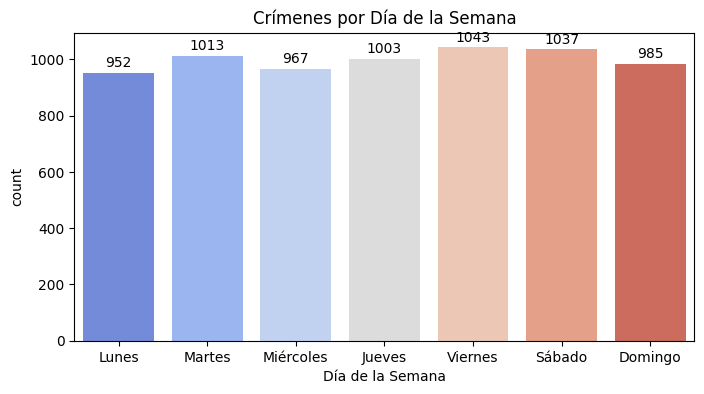

In [120]:
# Ordenar días en secuencia lógica
orden_dias = ["Lunes","Martes","Miércoles","Jueves","Viernes","Sábado","Domingo"]

plt.figure(figsize=(8,4))
ax = sns.countplot(x="Día de la Semana", data=df, order=orden_dias, palette="coolwarm")
plt.title("Crímenes por Día de la Semana")

# Añadir números encima de las barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 20, int(height), 
            ha="center", fontsize=10)

plt.show()


**Identificación de entidades y relaciones**

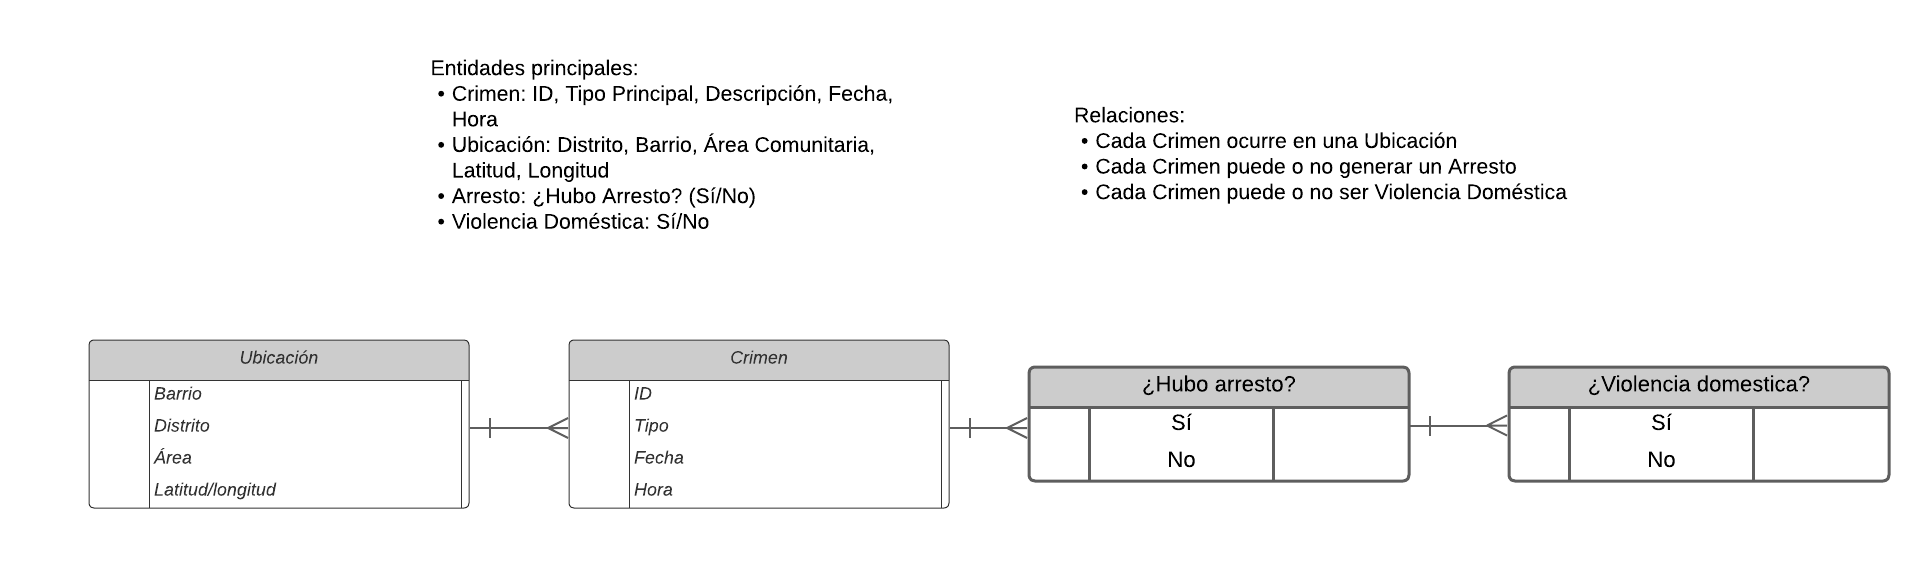

In [121]:
display(Image(filename="DIAGRAMA ER.png"))


**Agrupaciones y estadísticas por entidad**

In [122]:
# Agrupación: tipo de crimen vs arrestos
agrupado_tipo = df.groupby("Tipo Principal")["¿Hubo Arresto?"].value_counts().unstack(fill_value=0)
print("\n--- Arrestos por Tipo de Crimen ---")
print(agrupado_tipo.head())

# Agrupación: ubicación de crimen
agrupado_ubicacion = df["Ubicación"].value_counts().head(10)
print("\n--- Top 10 Ubicaciones con más Crímenes ---")
print(agrupado_ubicacion)




--- Arrestos por Tipo de Crimen ---
¿Hubo Arresto?        No   Sí
Tipo Principal               
ARSON                 10    3
ASSAULT              330   97
BATTERY              992  290
BURGLARY             385   26
CRIM SEXUAL ASSAULT   31    4

--- Top 10 Ubicaciones con más Crímenes ---
Ubicación
STREET                            1594
RESIDENCE                         1155
APARTMENT                          873
SIDEWALK                           821
OTHER                              270
PARKING LOT/GARAGE(NON.RESID.)     210
RESIDENTIAL YARD (FRONT/BACK)      147
ALLEY                              146
SMALL RETAIL STORE                 134
VEHICLE NON-COMMERCIAL             127
Name: count, dtype: int64


In [123]:
# Crímenes por Distrito
crimen_distrito = df.groupby("Distrito")["Tipo Principal"].count().sort_values(ascending=False)
print("\n--- Crímenes por Distrito ---")
display(crimen_distrito.head(10))

# Crímenes por Barrio
crimen_barrio = df.groupby("Barrio")["Tipo Principal"].count().sort_values(ascending=False)
print("\n--- Crímenes por Barrio ---")
display(crimen_barrio.head(10))




--- Crímenes por Distrito ---


Distrito
11.0    491
8.0     453
6.0     443
7.0     425
25.0    407
4.0     404
12.0    364
18.0    335
3.0     335
9.0     325
Name: Tipo Principal, dtype: int64


--- Crímenes por Barrio ---


Barrio
28.0    362
42.0    352
24.0    275
2.0     272
27.0    263
17.0    251
6.0     222
21.0    221
20.0    206
16.0    204
Name: Tipo Principal, dtype: int64